 ---------------------------------------------------------
## 1. IMPORT LIBRARY
 ---------------------------------------------------------
 Pada tahap ini, kita memanggil semua library yang diperlukan
 untuk memuat dataset, preprocessing gambar, membuat model CNN,
 serta visualisasi.

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report
import itertools


Kode  ini mengimpor beberapa pustaka penting yang umum digunakan dalam proyek machine learning dan analisis data. Pustaka tensorflow (diimpor sebagai tf) adalah framework utama yang digunakan untuk membangun dan melatih model pembelajaran mendalam. matplotlib.pyplot (diimpor sebagai plt) adalah alat standar untuk membuat visualisasi dan grafik, sering kali digunakan untuk memplot riwayat pelatihan model atau menampilkan gambar data. numpy (diimpor sebagai np) adalah pustaka fundamental untuk komputasi numerik, khususnya untuk bekerja dengan larik (array) multidimensi yang merupakan format data utama dalam machine learning. os menyediakan fungsi untuk berinteraksi dengan sistem operasi, seperti mengelola jalur file. Terakhir, kode ini mengimpor alat evaluasi model yang kuat dari sklearn.metrics, yaitu confusion_matrix dan classification_report, yang digunakan untuk menilai kinerja model klasifikasi, serta itertools yang berguna untuk membuat iterator untuk perulangan yang efisien.

 ---------------------------------------------------------
 2. LOAD DATASET YANG SUDAH DIBAGI (TRAIN & TEST)
 ---------------------------------------------------------
 Kita memasukkan path folder dataset.
 Dataset kamu berada di folder Tomato Leaf Disease.
 Pastikan di dalamnya sudah ada folder: train/ dan test/

Found 15064 files belonging to 10 classes.
Found 3771 files belonging to 10 classes.
Kelas: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


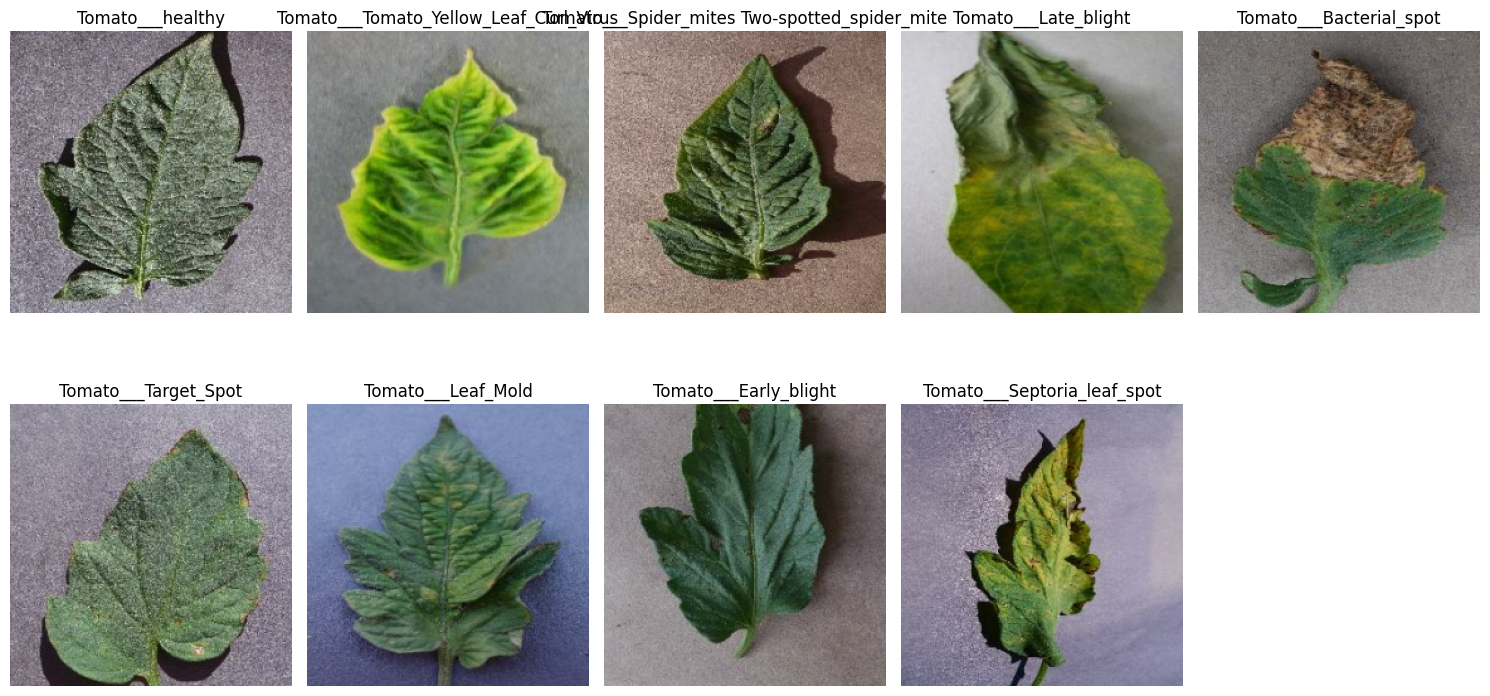

In [5]:
train_dir ="Tomato Leaf Disease/train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=50,     
    shuffle=True
)
test_ds ="Tomato Leaf Disease/test"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_ds,
    image_size=(224, 224),
    batch_size=50,     
    shuffle=False
)

class_names = train_ds.class_names
print("Kelas:", class_names)

# Ambil batch pertama
for images, labels in train_ds.take(1):
    plt.figure(figsize=(15, 8))

    shown_classes = set()
    index = 1

    for i in range(len(images)):
        label = labels[i].numpy()
        class_name = class_names[label]

        if class_name not in shown_classes:
            plt.subplot(2, 5, index)   
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")

            shown_classes.add(class_name)
            index += 1

        # Jika sudah 10 kelas, stop
        if len(shown_classes) == 10:
            break

    plt.tight_layout()
    plt.show()
    break

Kode di atas berfungsi untuk memuat dan memvisualisasikan data gambar daun tomat yang telah dikelompokkan berdasarkan jenis penyakitnya, menggunakan pustaka TensorFlow/Keras dan Matplotlib. Pertama, kode memuat dataset pelatihan (train_ds) dan pengujian (test_ds) dari direktori Google Drive yang ditentukan (train_dir dan test_ds) menggunakan fungsi tf.keras.preprocessing.image_dataset_from_directory. Dataset dikonfigurasi untuk menghasilkan gambar berukuran 224×224 piksel, dikelompokkan dalam batch berukuran 50. Dataset pelatihan (train_ds) diacak (shuffle=True), sementara dataset pengujian (test_ds) tidak diacak. Setelah itu, kode mengambil nama-nama kelas penyakit (class_names) dari dataset pelatihan dan mencetaknya. Terakhir, kode tersebut mengambil satu batch data dari dataset pelatihan (train_ds.take(1)) dan memvisualisasikan satu contoh gambar untuk setiap kelas penyakit yang ada (maksimal 10 kelas) menggunakan matplotlib.pyplot, memastikan bahwa perwakilan visual untuk

 ---------------------------------------------------------
 # 3. PREPROCESSING DENGAN ImageDataGenerator
 ---------------------------------------------------------
 Pada bagian ini kita melakukan:
   - Resize gambar
   - Augmentasi untuk data training


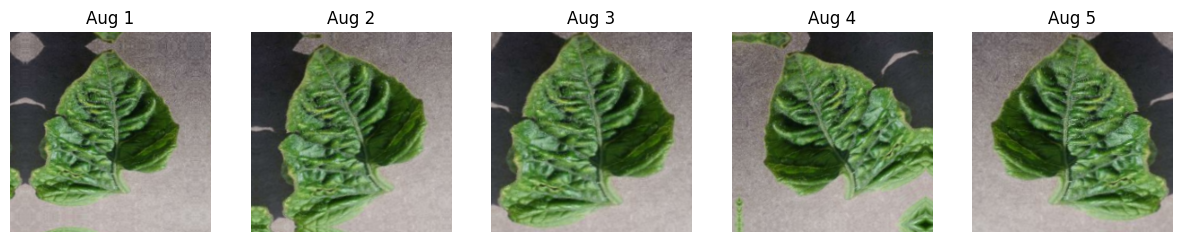

In [6]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2),
])

images, labels = next(iter(train_ds))
img = images[0]

plt.figure(figsize=(15, 3))

for i in range(5):
    aug_img = data_augmentation(
        tf.expand_dims(img, 0),
        training=True
    )

    plt.subplot(1, 5, i+1)
    plt.imshow(aug_img[0].numpy().astype("uint8"))
    plt.title(f"Aug {i+1}")
    plt.axis("off")

plt.show()

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

Kode di atas memiliki dua tujuan utama dalam proses Machine Learning: mendefinisikan teknik data augmentation dan mengaplikasikannya pada dataset pelatihan. Pertama, ia mendefinisikan lapisan augmentation sebagai model tf.keras.Sequential yang menerapkan transformasi acak seperti pembalikan horizontal (RandomFlip("horizontal")), rotasi (RandomRotation(0.1)), dan zoom (RandomZoom(0.2)). Bagian selanjutnya adalah visualisasi, di mana kode mengambil satu gambar dari train_ds, menerapkan urutan augmentation ini sebanyak lima kali dalam mode training, dan menampilkan hasilnya menggunakan Matplotlib untuk memverifikasi efek transformasi. Terakhir, kode tersebut menerapkan fungsi augmentation secara permanen ke seluruh train_ds menggunakan metode .map(). Ini memastikan bahwa setiap gambar yang diambil dari dataset pelatihan akan melewati lapisan augmentation secara dinamis, sehingga secara efektif meningkatkan ukuran dan variasi data pelatihan, yang sangat penting untuk mencegah overfitting pada model Transfer Learning.

In [7]:

print("Kelas dalam dataset:", class_names)

label_counts = np.zeros(len(class_names), dtype=int)

for _, labels in train_ds:
    label_counts += np.bincount(labels.numpy(), minlength=len(class_names))

print("Jumlah gambar per kelas:")
for i, count in enumerate(label_counts):
    print(f"{class_names[i]}: {count} gambar")

print("Total Files:", label_counts.sum())

Kelas dalam dataset: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Jumlah gambar per kelas:
Tomato___Bacterial_spot: 1701 gambar
Tomato___Early_blight: 800 gambar
Tomato___Late_blight: 1527 gambar
Tomato___Leaf_Mold: 800 gambar
Tomato___Septoria_leaf_spot: 1416 gambar
Tomato___Spider_mites Two-spotted_spider_mite: 1340 gambar
Tomato___Target_Spot: 1123 gambar
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 4285 gambar
Tomato___Tomato_mosaic_virus: 800 gambar
Tomato___healthy: 1272 gambar
Total Files: 15064


Kode di atas melakukan Analisis Eksplorasi Data (EDA) dasar pada dataset pelatihan untuk memahami distribusi kelas gambar. Pertama, kode menampilkan daftar semua nama kelas penyakit (class_names) yang telah diekstrak dari dataset. Selanjutnya, kode menghitung total jumlah gambar yang ada di setiap kelas. Proses penghitungan dilakukan dengan mengiterasi seluruh dataset pelatihan (train_ds), menggunakan fungsi np.bincount() pada label setiap batch untuk mengakumulasi hitungan, dan menyimpannya dalam larik label_counts. Terakhir, kode tersebut mencetak jumlah gambar untuk setiap kelas secara individual dan memberikan total keseluruhan file yang ada dalam dataset.

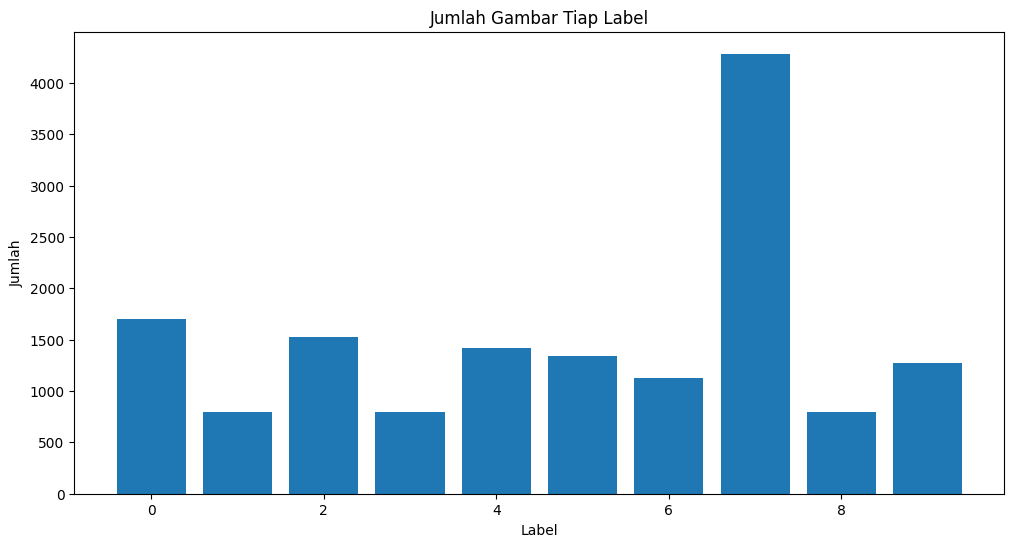

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(label_counts)), label_counts)
plt.title("Jumlah Gambar Tiap Label")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

Kode di atas berfungsi untuk memvisualisasikan hasil penghitungan jumlah gambar per kelas yang telah dilakukan pada langkah Analisis Eksplorasi Data (EDA) sebelumnya. Menggunakan pustaka Matplotlib, kode ini membuat diagram batang (bar chart) dengan ukuran figure yang disesuaikan (12×6). Sumbu X (x-axis) menampilkan nama-nama label (kelas penyakit), sementara Sumbu Y (y-axis) menunjukkan jumlah gambar untuk setiap label. Fungsi plt.xticks(rotation=45, ha='right') digunakan untuk memutar label Sumbu X sebesar 45∘ agar nama kelas yang panjang dapat terbaca tanpa tumpang tindih. Hasilnya adalah visualisasi yang jelas mengenai distribusi data antar kelas, membantu dalam mengidentifikasi potensi masalah ketidakseimbangan kelas (class imbalance) dalam dataset.

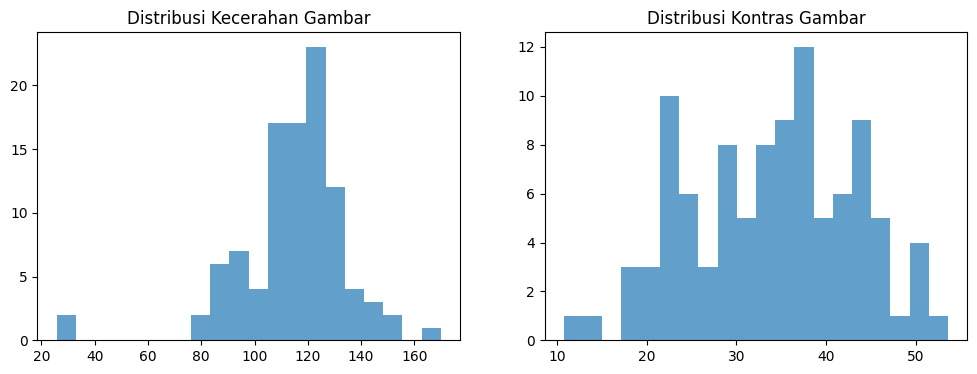

In [13]:
# Cek kecerahan dan kontras
brightness = []
contrast = []

for images, labels in train_ds.take(2):
    for img in images:
        img_gray = tf.image.rgb_to_grayscale(img)
        brightness.append(tf.reduce_mean(img_gray).numpy())
        contrast.append(tf.math.reduce_std(img_gray).numpy())

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(brightness, bins=20, alpha=0.7)
plt.title('Distribusi Kecerahan Gambar')

plt.subplot(1, 2, 2)
plt.hist(contrast, bins=20, alpha=0.7)
plt.title('Distribusi Kontras Gambar')
plt.show()

Kode di atas melakukan analisis distribusi kecerahan dan kontras dari sampel gambar dalam dataset pelatihan untuk keperluan Analisis Eksplorasi Data (EDA). Pertama, kode menginisialisasi dua daftar kosong, brightness dan contrast. Selanjutnya, ia mengambil dua batch pertama dari dataset pelatihan (train_ds.take(2)). Untuk setiap gambar dalam batch tersebut, gambar dikonversi dari RGB ke grayscale menggunakan tf.image.rgb_to_grayscale. Kecerahan gambar kemudian dihitung sebagai nilai rata-rata (mean) piksel gambar grayscale (tf.reduce_mean), sedangkan kontras dihitung sebagai deviasi standar (standard deviation) piksel gambar grayscale (tf.math.reduce_std). Hasil penghitungan ini dikumpulkan. Terakhir, kode tersebut memvisualisasikan distribusi nilai kecerahan dan kontras menggunakan dua histogram berdampingan dengan matplotlib.pyplot, yang membantu mengidentifikasi rentang nilai, outlier, dan kebutuhan normalisasi atau penyesuaian kecerahan/kontras pada data.

# ANALISIS WARNA PER CHANNEL

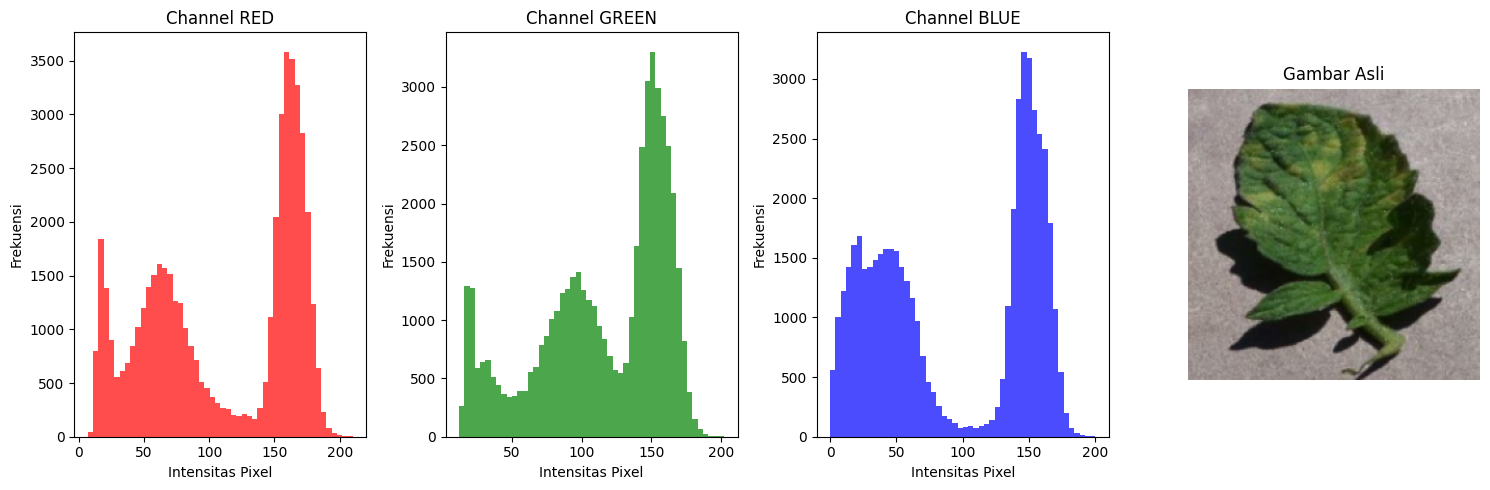

In [14]:

for images, labels in train_ds.take(1):
    sample_img = images[0].numpy()

    plt.figure(figsize=(15, 5))
    colors = ['red', 'green', 'blue']

    for i in range(3):
        plt.subplot(1, 4, i+1)
        plt.hist(sample_img[:,:,i].flatten(), bins=50, color=colors[i], alpha=0.7)
        plt.title(f'Channel {colors[i].upper()}')
        plt.xlabel('Intensitas Pixel')
        plt.ylabel('Frekuensi')

    plt.subplot(1, 4, 4)
    plt.imshow(sample_img.astype("uint8"))
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Kode di atas bertujuan untuk menganalisis dan memvisualisasikan distribusi intensitas piksel untuk setiap saluran warna (merah, hijau, dan biru) dari sebuah contoh gambar dalam dataset. Pertama, kode mengambil satu batch data dari dataset pelatihan (train_ds.take(1)) dan memilih gambar pertama (sample_img). Kemudian, dengan menggunakan Matplotlib, kode tersebut membuat tiga histogram terpisah yang ditampilkan berdampingan. Setiap histogram mewakili distribusi intensitas piksel (sumbu X) dan frekuensi (sumbu Y) untuk salah satu saluran warna (R, G, atau B) dari gambar tersebut, dengan warna yang sesuai. Sebagai referensi, gambar asli juga ditampilkan di plot keempat. Analisis histogram ini penting untuk memahami keseimbangan warna dan rentang dinamis data, yang dapat menginformasikan kebutuhan untuk pra-pemrosesan data seperti normalisasi.

# MODELING

### SEQUENTIAL

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(224, 224, 3)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,964,042 (45.64 MB)

 Trainable params: 11,964,042 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

Kode di atas mendefinisikan dan membangun arsitektur dasar model Convolutional Neural Network (CNN) yang sederhana menggunakan TensorFlow/Keras untuk klasifikasi penyakit daun tomat (total 10 kelas). Model ini dibuat secara sekuensial (models.Sequential) dan dimulai dengan Lapisan Input berukuran (224,224,3) diikuti oleh lapisan Rescaling yang menormalisasi nilai piksel dari 0−255 menjadi 0−1. Inti dari model terdiri dari dua blok: setiap blok memiliki Lapisan Konvolusi (Conv2D) yang mengekstrak fitur (dengan 32 dan 64 filter, masing-masing menggunakan activation ReLU) yang segera diikuti oleh Lapisan Max Pooling (MaxPooling2D) untuk mengurangi dimensi spasial fitur. Setelah fitur diekstrak, data diubah menjadi vektor 1D melalui Lapisan Flatten. Vektor ini kemudian dimasukkan ke Lapisan Fully Connected (Dense) dengan 64 neuron (ReLU) dan disertakan lapisan Dropout (0.5) untuk mencegah overfitting (penghafalan data). Akhirnya, Lapisan Output (Dense) dengan 10 neuron dan activation Softmax digunakan untuk menghasilkan probabilitas prediksi untuk setiap kelas penyakit. Model ini diakhiri dengan tahap Compile, menggunakan optimizer 'adam', fungsi loss 'sparse_categorical_crossentropy', dan dimonitor berdasarkan metrik 'accuracy', dan arsitektur lengkapnya kemudian dicetak melalui model.summary().

### MobileNetV2

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Rescaling, Lambda
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.optimizers import Adam
import sys

# Fungsi Pembuat Model MobileNetV2
def create_mobilenet_model_fix(input_shape, num_classes, use_pretrained_weights=False):
    inputs = tf.keras.Input(shape=input_shape)
    x = Rescaling(1./255)(inputs)
    x = Lambda(mobilenet_preprocess, name='mobilenet_preprocessing')(x)
    weights_mode = 'imagenet' if use_pretrained_weights else None
    try:
        base_model = MobileNetV2(
            input_shape=input_shape,
            include_top=False,
            weights=weights_mode
        )
    except Exception as e:
        print(f"Peringatan: Gagal memuat bobot 'imagenet'. Model dibuat tanpa bobot. Error: {e}")
        base_model = MobileNetV2(
            input_shape=input_shape,
            include_top=False,
            weights=None
        )
    base_model.trainable = False
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# --- EKSEKUSI UNTUK MENAMPILKAN OUTPUT ---
print("--- MobileNetV2 Model Summary ---")
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = IMAGE_SIZE + (3,)
NUM_CLASSES = 10 
mobilenet_model = create_mobilenet_model_fix(
    input_shape=INPUT_SHAPE,
    num_classes=NUM_CLASSES,
    use_pretrained_weights=False 
)

mobilenet_model.summary(line_length=150)

--- MobileNetV2 Model Summary ---



Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                                     ┃ Output Shape                                  
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ input_layer_2 (InputLayer)                                       │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ rescaling_1 (Rescaling)                                          │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ mobilenet_preprocessing (Lambda)                                 │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ mobilenetv2_1.00_224 (Functional)                                │ (None, 7, 7, 1280)                            
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ global_average_pooling2d (GlobalAveragePooling2D)                │ (None, 1280)                                  
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense_2 (Dense)                                                  │ (None, 128)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense_3 (Dense)                                                  │ (None, 10)                                    
└──────────────────────────────────────────────────────────────────┴───────────────────────────────────────────────

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Kode ini mendefinisikan sebuah fungsi, create_mobilenet_model_fix, untuk membangun model Transfer Learning menggunakan arsitektur MobileNetV2 dari Keras Applications. Fungsi ini menerima shape input, jumlah kelas, dan boolean untuk penggunaan bobot terlatih (pretrained weights) dari ImageNet. Model ini dimulai dengan Lapisan Input, diikuti oleh lapisan Rescaling dan Lambda yang menerapkan fungsi preprocessing spesifik MobileNetV2 (mobilenet_preprocess) untuk menormalisasi data sesuai kebutuhan model dasar. Selanjutnya, model memuat MobileNetV2 sebagai base_model dengan include_top=False (menghilangkan lapisan klasifikasi aslinya) dan berupaya memuat bobot 'imagenet', menggunakan blok try-except untuk menangani kegagalan jaringan. Setelah dimuat, base_model dibekukan (trainable = False) untuk mempertahankan fitur yang telah dipelajari. Lapisan atas (head) klasifikasi baru ditambahkan, terdiri dari GlobalAveragePooling2D, lapisan Dense 128 neuron (ReLU), dan lapisan Output Dense dengan jumlah neuron sesuai num_classes dan activation Softmax. Akhirnya, model dikompilasi menggunakan optimizer Adam dengan learning rate 0.001 dan fungsi loss 'categorical_crossentropy', dan kode eksekusi menunjukkan ringkasan (model.summary()) dari arsitektur yang telah dimodifikasi.

### ResNet50

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Rescaling, Lambda
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.optimizers import Adam
import sys
def create_resnet_model_fix(input_shape, num_classes, use_pretrained_weights=False):
    inputs = tf.keras.Input(shape=input_shape)
    x = Rescaling(1./255)(inputs)
    x = Lambda(resnet_preprocess, name='resnet_preprocessing')(x)
    weights_mode = 'imagenet' if use_pretrained_weights else None

    try:
        base_model = ResNet50(
            input_shape=input_shape,
            include_top=False,
            weights=weights_mode
        )
    except Exception as e:
        print(f"Peringatan: Gagal memuat bobot 'imagenet'. Model dibuat tanpa bobot. Error: {e}")
        base_model = ResNet50(
            input_shape=input_shape,
            include_top=False,
            weights=None
        )
    base_model.trainable = False
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x) 
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model
print("\n--- ResNet50 Model Summary ---")
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = IMAGE_SIZE + (3,)
NUM_CLASSES = 10
resnet_model = create_resnet_model_fix(
    input_shape=INPUT_SHAPE,
    num_classes=NUM_CLASSES,
    use_pretrained_weights=False 
)

resnet_model.summary(line_length=150)


--- ResNet50 Model Summary ---


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                                     ┃ Output Shape                                  
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ input_layer_4 (InputLayer)                                       │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ rescaling_2 (Rescaling)                                          │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ resnet_preprocessing (Lambda)                                    │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ resnet50 (Functional)                                            │ (None, 7, 7, 2048)                            
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ global_average_pooling2d_1 (GlobalAveragePooling2D)              │ (None, 2048)                                  
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense_4 (Dense)                                                  │ (None, 512)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense_5 (Dense)                                                  │ (None, 10)                                    
└──────────────────────────────────────────────────────────────────┴───────────────────────────────────────────────

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Kode di atas mendefinisikan sebuah fungsi, create_resnet_model_fix, yang mengimplementasikan Transfer Learning menggunakan arsitektur ResNet50 untuk klasifikasi gambar. Fungsi ini mengkonstruksi model dengan lapisan input yang diikuti oleh lapisan Rescaling dan lapisan Lambda yang menerapkan preprocessing spesifik ResNet50 (resnet_preprocess) untuk menstandardisasi input. Model dasar ResNet50 dimuat dari Keras Applications dengan include_top=False, dan fungsi ini mencoba memuat bobot terlatih 'imagenet' (dengan penanganan kesalahan jika gagal). Setelah dimuat, base_model dibekukan (trainable = False) untuk mempertahankan fitur yang telah dipelajari. Lapisan klasifikasi baru ditambahkan di atasnya, dimulai dengan GlobalAveragePooling2D, lapisan Dense 512 neuron (ReLU) – jumlah neuron yang lebih banyak dipilih karena ResNet50 lebih dalam dan kuat – dan diakhiri dengan lapisan Output Dense dengan num_classes neuron dan activation Softmax. Model ini kemudian di-compile menggunakan optimizer Adam dengan learning rate 0.001 dan fungsi loss 'categorical_crossentropy', dan kode eksekusi pada akhirnya mencetak ringkasan arsitektur model yang telah dibangun (resnet_model.summary()).

# TRAINING DAN EVALUASI MODEL

In [18]:

val_ds = train_ds.take(int(0.1 * tf.data.experimental.cardinality(train_ds).numpy()))
train_ds = train_ds.skip(int(0.1 * tf.data.experimental.cardinality(train_ds).numpy()))

Kode di atas berfungsi untuk memisahkan sebagian kecil data dari dataset pelatihan (train_ds) untuk dijadikan dataset validasi (val_ds), yang merupakan langkah opsional namun penting jika dataset validasi belum tersedia. Pertama, kode tersebut menghitung jumlah batch yang setara dengan 10% dari total batch dalam train_ds menggunakan tf.data.experimental.cardinality(train_ds).numpy(). Selanjutnya, val_ds dibuat dengan mengambil (take) sejumlah batch tersebut dari awal train_ds. Kemudian, train_ds yang asli diperbarui dengan melewatkan (skip) jumlah batch yang telah diambil tadi, sehingga memastikan bahwa tidak ada duplikasi data antara dataset pelatihan dan validasi. Proses ini penting untuk memantau kinerja model selama pelatihan pada data yang belum pernah dilihat tanpa mencemari dataset pengujian.

In [19]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.99 and logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

Kode di atas mendefinisikan custom callback Keras bernama myCallback, yang merupakan teknik penting untuk mengontrol proses pelatihan model secara dinamis. Callback ini dirancang untuk menghentikan pelatihan secara otomatis (early stopping) segera setelah kondisi kinerja tertentu terpenuhi. Secara spesifik, metode on_epoch_end akan dieksekusi di akhir setiap epoch, dan akan memeriksa dua kondisi secara bersamaan: jika akurasi pelatihan (logs.get('accuracy')) melebihi 99% dan akurasi validasi (logs.get('val_accuracy')) juga melebihi 99%. Jika kedua syarat tersebut terpenuhi, kode akan mencetak pesan konfirmasi dan mengatur flag self.model.stop_training menjadi True, yang secara efektif menghentikan proses pelatihan model, sehingga menghemat waktu komputasi dan mencegah overfitting yang tidak perlu.

In [20]:
callbacks = myCallback()

Kode di atas berfungsi untuk menginisialisasi (membuat instance atau objek) custom callback yang telah didefinisikan sebelumnya, yaitu myCallback. Dengan menjalankan callbacks = myCallback(), sebuah objek callback dibuat dan disimpan dalam variabel callbacks. Objek ini kini siap untuk diteruskan ke fungsi pelatihan model (model.fit), memungkinkan Keras untuk secara otomatis memantau akurasi validasi dan pelatihan selama setiap epoch dan menghentikan proses pelatihan secara dini jika kedua metrik tersebut mencapai ambang batas 99% yang telah ditentukan.

# Base Model

In [ ]:
history = model.fit(train_ds,
                    validation_data =  val_ds,
                    epochs = 30,
                    callbacks=callbacks,
                    verbose = 1)

Epoch 1/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 72s 216ms/step - accuracy: 0.3734 - loss: 2.0955 - val_accuracy: 0.7627 - val_loss: 0.8399
Epoch 2/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 199ms/step - accuracy: 0.6492 - loss: 1.0230 - val_accuracy: 0.8227 - val_loss: 0.6272
Epoch 3/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 198ms/step - accuracy: 0.7019 - loss: 0.8502 - val_accuracy: 0.8493 - val_loss: 0.4751
Epoch 4/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 197ms/step - accuracy: 0.7487 - loss: 0.7165 - val_accuracy: 0.8793 - val_loss: 0.3791
Epoch 5/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 58s 196ms/step - accuracy: 0.7682 - loss: 0.6294 - val_accuracy: 0.8833 - val_loss: 0.3439
Epoch 6/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 198ms/step - accuracy: 0.7903 - loss: 0.5819 - val_accuracy: 0.8953 - val_loss: 0.3117
Epoch 7/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 58s 196ms/step - accuracy: 0.8094 - loss: 0.5230 - val_accuracy: 0.8827 - val_loss: 0.3447
Epoch 8/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 198ms/step - accuracy: 0.8213 - loss: 0

Kode di atas berfungsi untuk melatih model Deep Learning yang telah dikonfigurasi sebelumnya (baik CNN sederhana, MobileNetV2, atau ResNet50) menggunakan data yang telah disiapkan. Pelatihan dilakukan dengan memanggil metode model.fit(), yang menerima dataset pelatihan (train_ds) sebagai input utama. Kinerja model akan divalidasi dan dipantau selama pelatihan menggunakan dataset validasi (val_ds). Proses pelatihan diatur untuk berjalan selama 30 epoch. Selain itu, custom callback (callbacks), yang sebelumnya didefinisikan untuk menghentikan pelatihan secara dini ketika akurasi pelatihan dan validasi melebihi 99%, juga diteruskan ke fungsi. Seluruh riwayat dan metrik pelatihan, termasuk loss dan akurasi untuk data pelatihan dan validasi di setiap epoch, akan direkam dan disimpan dalam variabel history untuk analisis dan visualisasi lebih lanjut setelah pelatihan selesai.

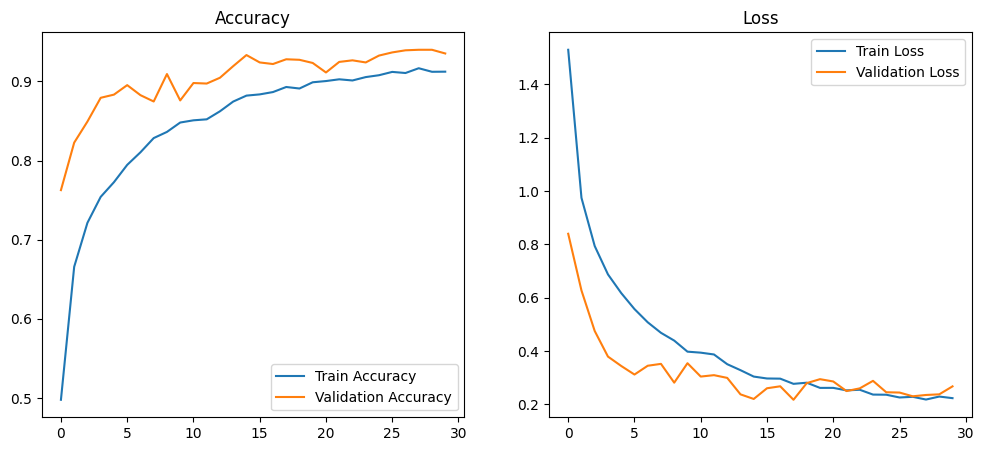

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


Kode di atas berfungsi untuk memvisualisasikan metrik kinerja model yang direkam selama pelatihan dan disimpan dalam objek history. Pertama, kode mengekstrak riwayat akurasi pelatihan (acc), akurasi validasi (val_acc), loss pelatihan (loss), dan loss validasi (val_loss) dari objek history. Kemudian, dengan menggunakan Matplotlib, kode membuat dua subplot dalam satu figure berukuran 12×5. Subplot pertama menampilkan kurva Akurasi dengan memplot acc dan val_acc terhadap rentang epoch (epochs_range), yang membantu mengidentifikasi seberapa baik model belajar dan seberapa baik ia digeneralisasi. Subplot kedua menampilkan kurva Loss dengan memplot loss dan val_loss, yang menunjukkan seberapa besar kesalahan model berkurang seiring waktu. Kedua plot dilengkapi dengan legenda dan judul, memberikan analisis visual yang cepat mengenai stabilitas pelatihan dan mendeteksi masalah seperti overfitting (jika akurasi pelatihan terus naik sementara akurasi validasi menurun).

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


76/76 ━━━━━━━━━━━━━━━━━━━━ 633s 8s/step - accuracy: 0.8410 - loss: 0.8556
Test Accuracy: 0.8833200931549072
Test Loss: 0.5947316884994507


Kode di atas berfungsi untuk mengevaluasi kinerja akhir dari model Deep Learning yang telah dilatih. Dengan memanggil metode model.evaluate(test_ds), model dijalankan terhadap data pengujian (test_ds) yang benar-benar baru dan belum pernah digunakan selama proses pelatihan atau validasi. Metode ini secara otomatis menghitung loss dan metrik yang telah dikonfigurasi saat model di-compile (dalam hal ini, loss dan akurasi). Hasilnya kemudian disimpan dalam variabel test_loss dan test_acc. Terakhir, kedua nilai tersebut dicetak ke konsol, memberikan angka definitif mengenai kemampuan generalisasi model (yaitu, seberapa baik model berkinerja pada data dunia nyata).

76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.90      0.97      0.94       426
                        Tomato___Early_blight       0.79      0.38      0.51       200
                         Tomato___Late_blight       0.87      0.76      0.81       382
                           Tomato___Leaf_Mold       0.81      0.78      0.79       200
                  Tomato___Septoria_leaf_spot       0.75      0.81      0.78       355
Tomato___Spider_mites Two-spotted_spider_mite       0.84      0.95      0.89       336
                         Tomato___Target_Spot       0.82      0.85      0.84       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.95      0.98      0.97      1072
                 Tomato___Tomato_mosaic_virus       0.91      0.94      0.92       200
                             Tomato___healthy       0.94      0.98      0.96       319


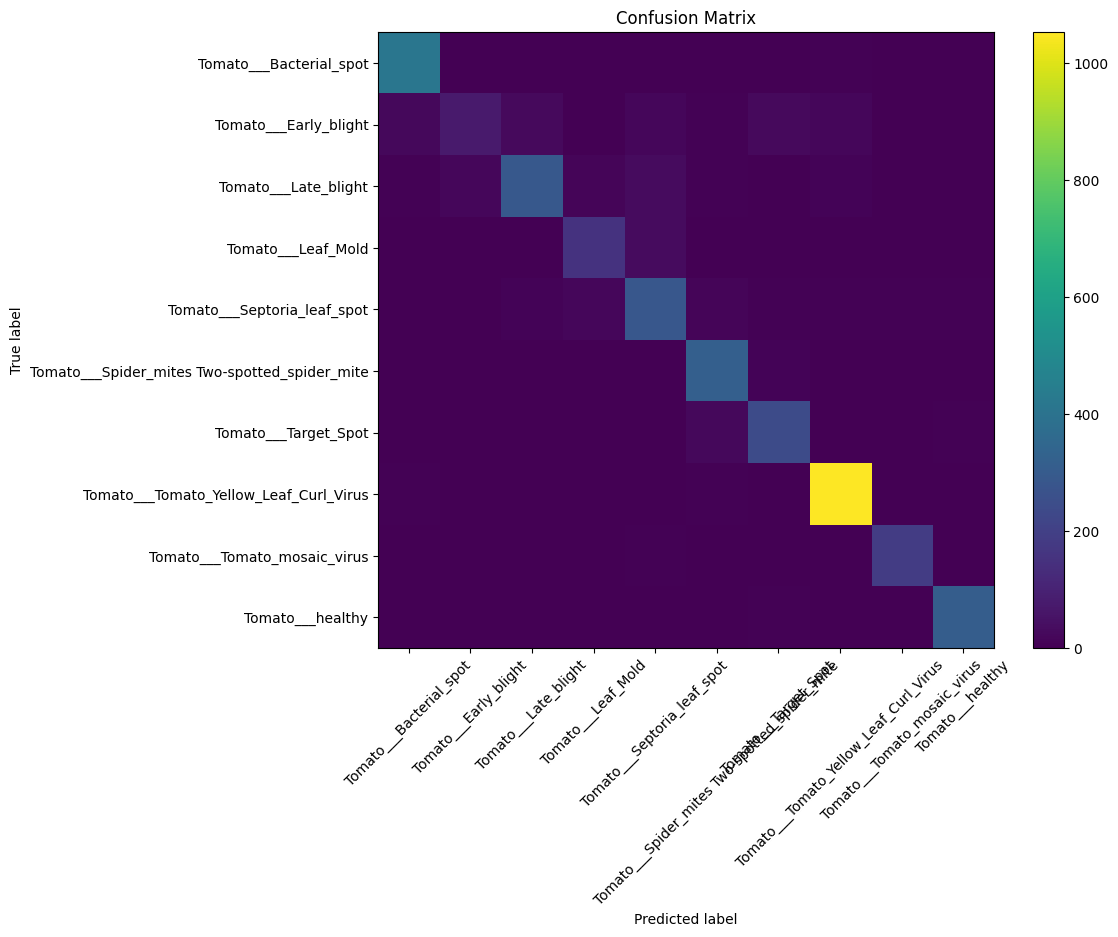

In [ ]:

class_names = test_ds.class_names

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

cm = confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred, target_names=class_names))

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Kode di atas berfungsi untuk melakukan analisis mendalam terhadap kinerja model klasifikasi pada data pengujian, terutama berfokus pada evaluasi per kelas. Pertama, ia mendapatkan nama-nama kelas (class_names) dan kemudian menghasilkan label sebenarnya (y_true) dan prediksi model (y_pred) untuk seluruh dataset pengujian (test_ds). Prediksi model diperoleh menggunakan model.predict(test_ds) dan mengambil indeks probabilitas tertinggi (np.argmax). Selanjutnya, kode menghitung Confusion Matrix (cm) menggunakan confusion_matrix(y_true, y_pred), yang merupakan tabel ringkasan kinerja klasifikasi. Hasil evaluasi per kelas kemudian dicetak menggunakan Classification Report (classification_report) yang merangkum metrik presisi, recall, dan f1-score untuk setiap kelas. Terakhir, kode memvisualisasikan Confusion Matrix sebagai heatmap menggunakan Matplotlib, di mana setiap sumbu menampilkan label kelas dan intensitas warna menunjukkan jumlah sampel yang diprediksi benar atau salah, memberikan gambaran visual yang jelas tentang kekeliruan prediksi antar kelas.

# MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Lambda, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam


def create_mobilenet_model(
    input_shape,
    num_classes,
    use_pretrained_weights=True,
    dense_units=64,
    dropout_rate=0.5

    tf.keras.backend.clear_session()

    inputs = tf.keras.Input(shape=input_shape)

    x = Lambda(
        tf.keras.applications.mobilenet_v2.preprocess_input,
        name="mobilenet_preprocessing"
    )(inputs)

    # Load base model
    weights_mode = "imagenet" if use_pretrained_weights else None

    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights=weights_mode
    )

    base_model.trainable = False

    # Head model
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D(name="gap")(x)
    x = Dense(dense_units, activation="relu", name="dense")(x)
    x = Dropout(dropout_rate, name="dropout")(x)
    outputs = Dense(num_classes, activation="softmax", name="predictions")(x)

    # Model
    model = Model(inputs, outputs, name="MobileNetV2_TransferLearning")

    # Compile (SAMA seperti code kedua)
    model.compile(
        optimizer=Adam(),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


# =======================
# EKSEKUSI
# =======================
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = IMAGE_SIZE + (3,)
NUM_CLASSES = 10

mobilenet_model = create_mobilenet_model(
    input_shape=INPUT_SHAPE,
    num_classes=NUM_CLASSES,
    use_pretrained_weights=True
)

# Tampilkan arsitektur
mobilenet_model.summary(line_length=150)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobileNetV2_TransferLearning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                                     ┃ Output Shape                                  
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ input_layer (InputLayer)                                         │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ mobilenet_preprocessing (Lambda)                                 │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ mobilenetv2_1.00_224 (Functional)                                │ (None, 7, 7, 1280)                            
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ gap (GlobalAveragePooling2D)                                     │ (None, 1280)                                  
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense (Dense)                                                    │ (None, 64)                                    
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dropout (Dropout)                                                │ (None, 64)                                    
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ predictions (Dense)                                              │ (None, 10)                                    
└──────────────────────────────────────────────────────────────────┴───────────────────────────────────────────────

 Total params: 2,340,618 (8.93 MB)

 Trainable params: 82,634 (322.79 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Kode di atas mendefinisikan sebuah fungsi Python bernama create_mobilenet_model untuk membangun model Transfer Learning menggunakan arsitektur MobileNetV2 dari Keras. Fungsi ini memulai dengan membersihkan sesi Keras dan mengambil input gambar. Model ini menerapkan preprocessing standar MobileNetV2 melalui lapisan Lambda untuk menormalisasi data, kemudian memuat base_model MobileNetV2 dari Keras Applications, secara default menggunakan bobot terlatih 'imagenet' dan menghilangkan lapisan atas (include_top=False). Model dasar ini dibekukan (base_model.trainable = False). Lapisan klasifikasi baru (disebut head model) ditambahkan di atasnya, terdiri dari GlobalAveragePooling2D, lapisan Dense (dengan jumlah unit default 64 dan activation ReLU), dan lapisan Dropout (default 0.5) untuk mencegah overfitting. Lapisan output adalah lapisan Dense dengan num_classes neuron dan activation Softmax. Model ini kemudian di-compile menggunakan optimizer Adam dan fungsi loss 'sparse_categorical_crossentropy' dengan metrik akurasi. Bagian eksekusi menginisialisasi model dengan ukuran input (224,224,3) dan 10 kelas, lalu mencetak ringkasan arsitektur model (mobilenet_model.summary()).

In [ ]:
history = mobilenet_model.fit(train_ds,
                    validation_data =  val_ds,
                    epochs = 30,
                    callbacks=callbacks,
                    verbose = 1)

Epoch 1/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 102s 287ms/step - accuracy: 0.5266 - loss: 1.4069 - val_accuracy: 0.8753 - val_loss: 0.4287
Epoch 2/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 66s 226ms/step - accuracy: 0.7924 - loss: 0.6120 - val_accuracy: 0.9087 - val_loss: 0.3358
Epoch 3/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 60s 202ms/step - accuracy: 0.8276 - loss: 0.5046 - val_accuracy: 0.9147 - val_loss: 0.2740
Epoch 4/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 83s 202ms/step - accuracy: 0.8594 - loss: 0.4255 - val_accuracy: 0.9133 - val_loss: 0.2739
Epoch 5/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 60s 202ms/step - accuracy: 0.8704 - loss: 0.3859 - val_accuracy: 0.9200 - val_loss: 0.2420
Epoch 6/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 60s 201ms/step - accuracy: 0.8765 - loss: 0.3605 - val_accuracy: 0.9260 - val_loss: 0.2170
Epoch 7/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 201ms/step - accuracy: 0.8907 - loss: 0.3289 - val_accuracy: 0.9347 - val_loss: 0.2175
Epoch 8/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 60s 202ms/step - accuracy: 0.8921 - loss: 

Kode di atas berfungsi untuk melatih lapisan klasifikasi (head) dari model Transfer Learning MobileNetV2 yang telah dibekukan. Pelatihan dilakukan dengan memanggil metode mobilenet_model.fit(), menggunakan dataset pelatihan (train_ds) sebagai input, dan memantau kinerjanya menggunakan dataset validasi (val_ds). Proses pelatihan diatur untuk berjalan selama 30 epoch. Yang penting, custom callback (callbacks) yang telah didefinisikan sebelumnya juga disertakan; callback ini akan menghentikan pelatihan secara dini (early stopping) jika akurasi pelatihan dan validasi melebihi 99%. Semua metrik pelatihan, termasuk loss dan akurasi, direkam di setiap epoch dan disimpan dalam variabel history untuk analisis dan visualisasi kemajuan model selanjutnya.

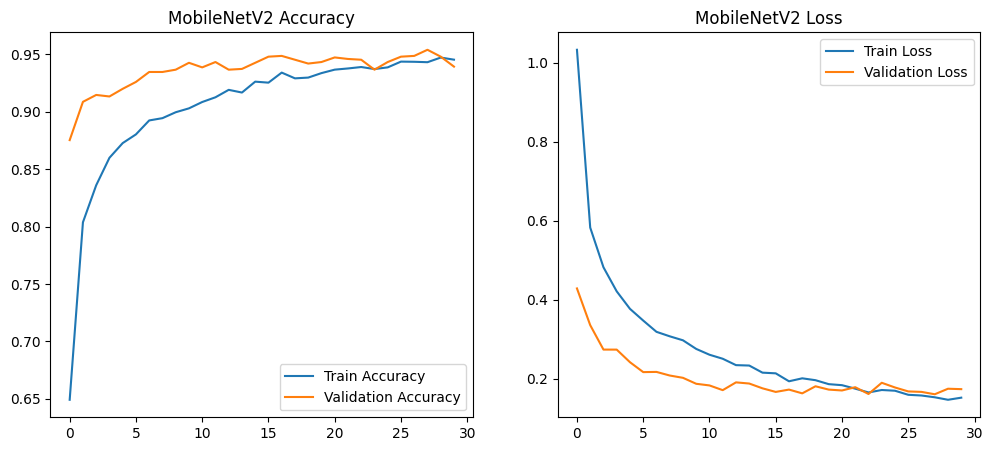

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('MobileNetV2 Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('MobileNetV2 Loss')
plt.legend()

plt.show()

Kode di atas berfungsi untuk memvisualisasikan metrik kinerja pelatihan dari model MobileNetV2 yang telah dilatih, menggunakan data yang direkam dalam objek history. Pertama, kode mengambil riwayat akurasi pelatihan (acc), akurasi validasi (val_acc), loss pelatihan (loss), dan loss validasi (val_loss). Kemudian, menggunakan Matplotlib, kode membuat dua plot berdampingan dalam satu figure (12×5). Subplot pertama menampilkan kurva Akurasi untuk data pelatihan dan validasi, dengan judul 'MobileNetV2 Accuracy'. Subplot kedua menampilkan kurva Loss untuk data pelatihan dan validasi, dengan judul 'MobileNetV2 Loss'. Visualisasi ini memungkinkan pengguna untuk menilai stabilitas pelatihan dan mendeteksi tanda-tanda overfitting atau underfitting pada model Transfer Learning MobileNetV2.

In [ ]:
test_loss, test_acc = mobilenet_model.evaluate(test_ds)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


76/76 ━━━━━━━━━━━━━━━━━━━━ 769s 10s/step - accuracy: 0.9149 - loss: 0.2676
Test Accuracy: 0.9342349767684937
Test Loss: 0.21158559620380402


Kode di atas berfungsi untuk mengevaluasi kinerja akhir dari model MobileNetV2 yang telah dilatih. Dengan memanggil metode mobilenet_model.evaluate(test_ds), model dijalankan terhadap data pengujian (test_ds) yang independen. Metode ini menghitung loss dan akurasi model pada data tersebut, mengukur seberapa baik model dapat menggeneralisasi ke data yang belum pernah dilihat. Hasil evaluasi ini disimpan dalam variabel test_loss dan test_acc. Terakhir, kedua nilai tersebut dicetak ke konsol, yang memberikan angka kinerja definitif dari model MobileNetV2 pada tugas klasifikasi penyakit daun tomat.

76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 177ms/step
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.95      0.95       426
                        Tomato___Early_blight       0.78      0.77      0.78       200
                         Tomato___Late_blight       0.96      0.91      0.93       382
                           Tomato___Leaf_Mold       0.88      0.93      0.90       200
                  Tomato___Septoria_leaf_spot       0.92      0.90      0.91       355
Tomato___Spider_mites Two-spotted_spider_mite       0.93      0.88      0.90       336
                         Tomato___Target_Spot       0.85      0.88      0.87       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99      1072
                 Tomato___Tomato_mosaic_virus       0.94      0.98      0.96       200
                             Tomato___healthy       0.93      0.98      0.96       319


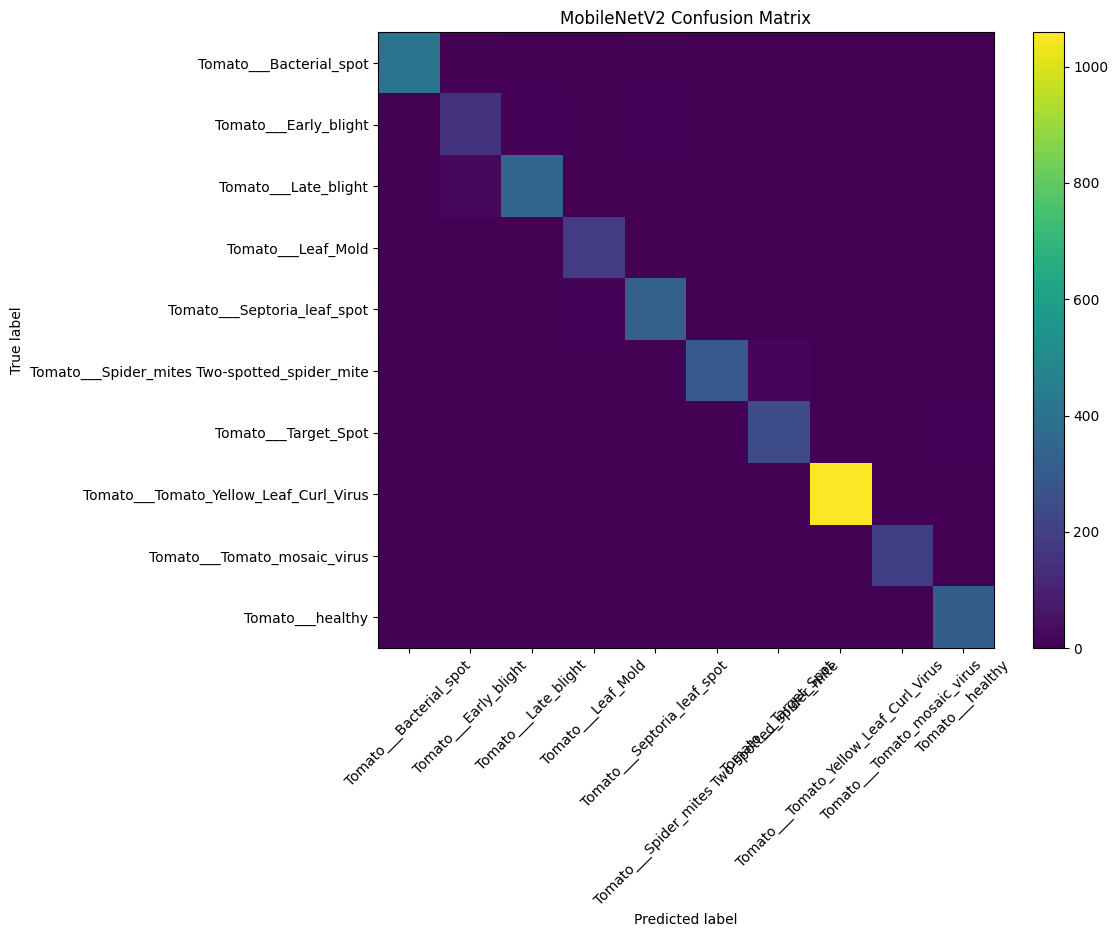

In [ ]:
# Get class names
class_names = test_ds.class_names

# Get predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(mobilenet_model.predict(test_ds), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest')
plt.title("MobileNetV2 Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Kode di atas melaksanakan analisis kinerja per kelas yang komprehensif untuk model MobileNetV2 yang telah dilatih. Pertama, ia mengambil nama-nama kelas yang relevan (class_names) dan kemudian menghasilkan label sebenarnya (y_true) dan prediksi model (y_pred) dari dataset pengujian (test_ds). Prediksi model dihasilkan oleh mobilenet_model.predict(test_ds). Selanjutnya, kode menghitung Confusion Matrix (cm) menggunakan confusion_matrix(y_true, y_pred), yang menjadi dasar untuk analisis visual dan statistik. Secara statistik, kode mencetak Classification Report yang memberikan metrik rinci seperti presisi, recall, dan f1-score untuk setiap kelas. Terakhir, Confusion Matrix divisualisasikan sebagai heatmap menggunakan Matplotlib, diberi judul 'MobileNetV2 Confusion Matrix', dengan label sumbu yang jelas. Visualisasi ini sangat penting untuk mengidentifikasi kelas mana yang sering salah diklasifikasikan oleh model.

# ResNet50

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Lambda, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam


def create_resnet50_model(
    input_shape,
    num_classes,
    use_pretrained_weights=True,
    dense_units=512,
    dropout_rate=0.5
):
    """
    Membuat model ResNet50 untuk transfer learning
    dengan preprocessing standar dan arsitektur stabil.
    """

    # Bersihkan session (penting jika training berurutan)
    tf.keras.backend.clear_session()

    # Input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Preprocessing standar ResNet50 (TANPA Rescaling)
    x = Lambda(
        tf.keras.applications.resnet50.preprocess_input,
        name="resnet50_preprocessing"
    )(inputs)

    # Load base model
    weights_mode = "imagenet" if use_pretrained_weights else None

    base_model = ResNet50(
        input_shape=input_shape,
        include_top=False,
        weights=weights_mode
    )

    base_model.trainable = False

    # Head model
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D(name="gap")(x)
    x = Dense(dense_units, activation="relu", name="dense")(x)
    x = Dropout(dropout_rate, name="dropout")(x)
    outputs = Dense(num_classes, activation="softmax", name="predictions")(x)

    # Model
    model = Model(inputs, outputs, name="ResNet50_TransferLearning")

    # Compile (label integer)
    model.compile(
        optimizer=Adam(),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


# =======================
# EKSEKUSI
# =======================
print("\n--- ResNet50 Model Summary ---")

IMAGE_SIZE = (224, 224)
INPUT_SHAPE = IMAGE_SIZE + (3,)
NUM_CLASSES = 10

resnet_model = create_resnet50_model(
    input_shape=INPUT_SHAPE,
    num_classes=NUM_CLASSES,
    use_pretrained_weights=True
)

resnet_model.summary(line_length=150)



--- ResNet50 Model Summary ---
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "ResNet50_TransferLearning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                                     ┃ Output Shape                                  
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ input_layer (InputLayer)                                         │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ resnet50_preprocessing (Lambda)                                  │ (None, 224, 224, 3)                           
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ resnet50 (Functional)                                            │ (None, 7, 7, 2048)                            
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ gap (GlobalAveragePooling2D)                                     │ (None, 2048)                                  
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dense (Dense)                                                    │ (None, 512)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ dropout (Dropout)                                                │ (None, 512)                                   
├──────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────
│ predictions (Dense)                                              │ (None, 10)                                    
└──────────────────────────────────────────────────────────────────┴───────────────────────────────────────────────

 Total params: 24,641,930 (94.00 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Kode di atas mendefinisikan sebuah fungsi Python, create_resnet50_model, untuk membangun model Transfer Learning menggunakan arsitektur ResNet50 dari Keras Applications. Fungsi ini dirancang untuk menerima ukuran input, jumlah kelas, dan parameter dropout. Model ini dimulai dengan membersihkan sesi Keras dan mengambil input gambar, lalu menerapkan preprocessing standar ResNet50 melalui lapisan Lambda (tf.keras.applications.resnet50.preprocess_input). Kemudian, model memuat ResNet50 sebagai base_model (secara default menggunakan bobot 'imagenet' dan include_top=False). Model dasar ini dibekukan (base_model.trainable = False) untuk mempertahankan fitur yang telah dipelajari. Lapisan klasifikasi baru (disebut head model) ditambahkan di atasnya, terdiri dari GlobalAveragePooling2D, lapisan Dense (dengan default 512 unit dan ReLU), dan lapisan Dropout (default 0.5). Lapisan output adalah lapisan Dense dengan num_classes neuron dan activation Softmax. Model ini di-compile menggunakan optimizer Adam dan fungsi loss 'sparse_categorical_crossentropy'. Bagian eksekusi kemudian menginisialisasi model dengan parameter yang ditentukan (misalnya, 224×224×3 dan 10 kelas) dan mencetak ringkasan arsitekturnya (resnet_model.summary()).

In [10]:
history_resnet = resnet_model.fit(train_ds,
                    validation_data =  val_ds,
                    epochs = 30,
                    callbacks=callbacks,
                    verbose = 1)

Epoch 1/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 4776s 16s/step - accuracy: 0.7375 - loss: 0.8533 - val_accuracy: 0.9433 - val_loss: 0.1585
Epoch 2/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 60s 201ms/step - accuracy: 0.9291 - loss: 0.2104 - val_accuracy: 0.9647 - val_loss: 0.1049
Epoch 3/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 200ms/step - accuracy: 0.9441 - loss: 0.1658 - val_accuracy: 0.9773 - val_loss: 0.0787
Epoch 4/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 198ms/step - accuracy: 0.9565 - loss: 0.1264 - val_accuracy: 0.9787 - val_loss: 0.0674
Epoch 5/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 60s 201ms/step - accuracy: 0.9668 - loss: 0.0955 - val_accuracy: 0.9807 - val_loss: 0.0630
Epoch 6/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 198ms/step - accuracy: 0.9631 - loss: 0.1053 - val_accuracy: 0.9773 - val_loss: 0.0665
Epoch 7/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 60s 201ms/step - accuracy: 0.9709 - loss: 0.0810 - val_accuracy: 0.9793 - val_loss: 0.0688
Epoch 8/30
272/272 ━━━━━━━━━━━━━━━━━━━━ 59s 199ms/step - accuracy: 0.9698 - loss: 0

Kode di atas memulai proses pelatihan lapisan klasifikasi (head) dari model Transfer Learning ResNet50 yang telah dikonfigurasi. Pelatihan dilakukan melalui metode resnet_model.fit(), menggunakan dataset pelatihan (train_ds) dan memvalidasi kinerja menggunakan dataset validasi (val_ds). Prosesnya diatur untuk berjalan selama 30 epoch. Custom callback (callbacks) yang disertakan akan secara otomatis menghentikan pelatihan secara dini (early stopping) jika akurasi pelatihan dan validasi melebihi 99%. Semua metrik pelatihan, termasuk loss dan akurasi di setiap epoch, akan direkam dan disimpan dalam variabel history_resnet untuk tujuan analisis dan visualisasi kemajuan model ResNet50.

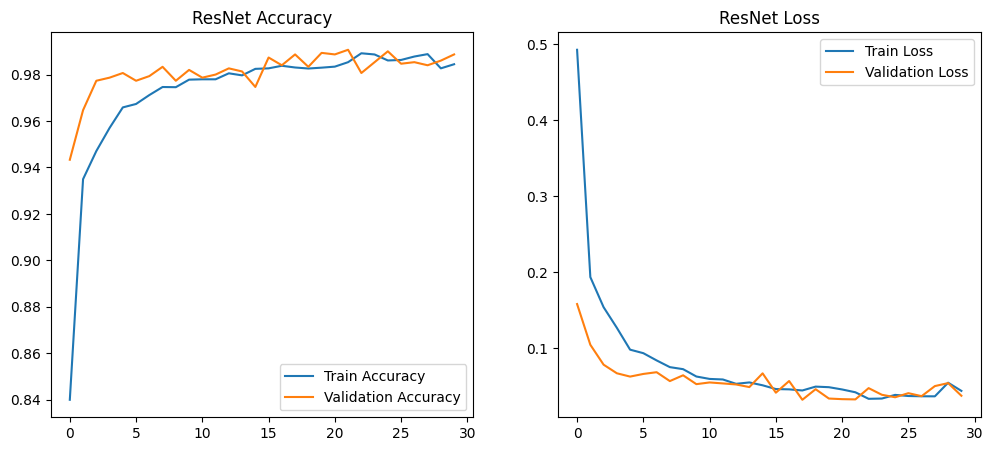

In [11]:
acc = history_resnet.history['accuracy']
val_acc = history_resnet.history['val_accuracy']

loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('ResNet Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('ResNet Loss')
plt.legend()

plt.show()

Kode di atas berfungsi untuk memvisualisasikan kinerja pelatihan dari model ResNet50 yang telah dilatih, menggunakan data yang dicatat dalam objek history_resnet. Pertama, kode ini mengekstrak riwayat akurasi pelatihan (acc), akurasi validasi (val_acc), loss pelatihan (loss), dan loss validasi (val_loss). Kemudian, dengan menggunakan Matplotlib, kode membuat dua plot berdampingan dalam satu figure (12×5). Subplot pertama menampilkan kurva Akurasi untuk data pelatihan dan validasi, yang diberi judul 'ResNet Accuracy'. Subplot kedua menampilkan kurva Loss untuk data pelatihan dan validasi, yang diberi judul 'ResNet Loss'. Visualisasi ini sangat penting untuk menganalisis stabilitas pelatihan ResNet50 dan mendeteksi secara visual adanya indikasi overfitting (jika loss validasi meningkat sementara loss pelatihan menurun) atau underfitting.

In [12]:
test_loss, test_acc = resnet_model.evaluate(test_ds)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1168s 15s/step - accuracy: 0.9821 - loss: 0.0718
Test Accuracy: 0.9846194386482239
Test Loss: 0.05904524028301239


Kode di atas berfungsi untuk mengevaluasi kinerja akhir dari model ResNet50 yang telah dilatih pada tugas klasifikasi. Dengan memanggil metode resnet_model.evaluate(test_ds), model dijalankan terhadap data pengujian (test_ds) yang independen dan belum pernah digunakan dalam pelatihan atau validasi. Proses ini secara otomatis menghitung loss dan akurasi model pada data tersebut. Hasil evaluasi ini disimpan dalam variabel test_loss dan test_acc. Terakhir, kedua nilai tersebut dicetak ke konsol, memberikan angka kinerja definitif dari model ResNet50 pada data yang tidak terlihat, yang mengukur kemampuan generalisasi model.

76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.99      1.00      0.99       426
                        Tomato___Early_blight       0.98      0.91      0.95       200
                         Tomato___Late_blight       0.97      0.99      0.98       382
                           Tomato___Leaf_Mold       0.96      0.98      0.97       200
                  Tomato___Septoria_leaf_spot       0.98      0.99      0.98       355
Tomato___Spider_mites Two-spotted_spider_mite       0.98      0.98      0.98       336
                         Tomato___Target_Spot       0.96      0.96      0.96       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.99      1.00      1072
                 Tomato___Tomato_mosaic_virus       0.99      1.00      0.99       200
                             Tomato___healthy       0.99      0.99      0.99       319


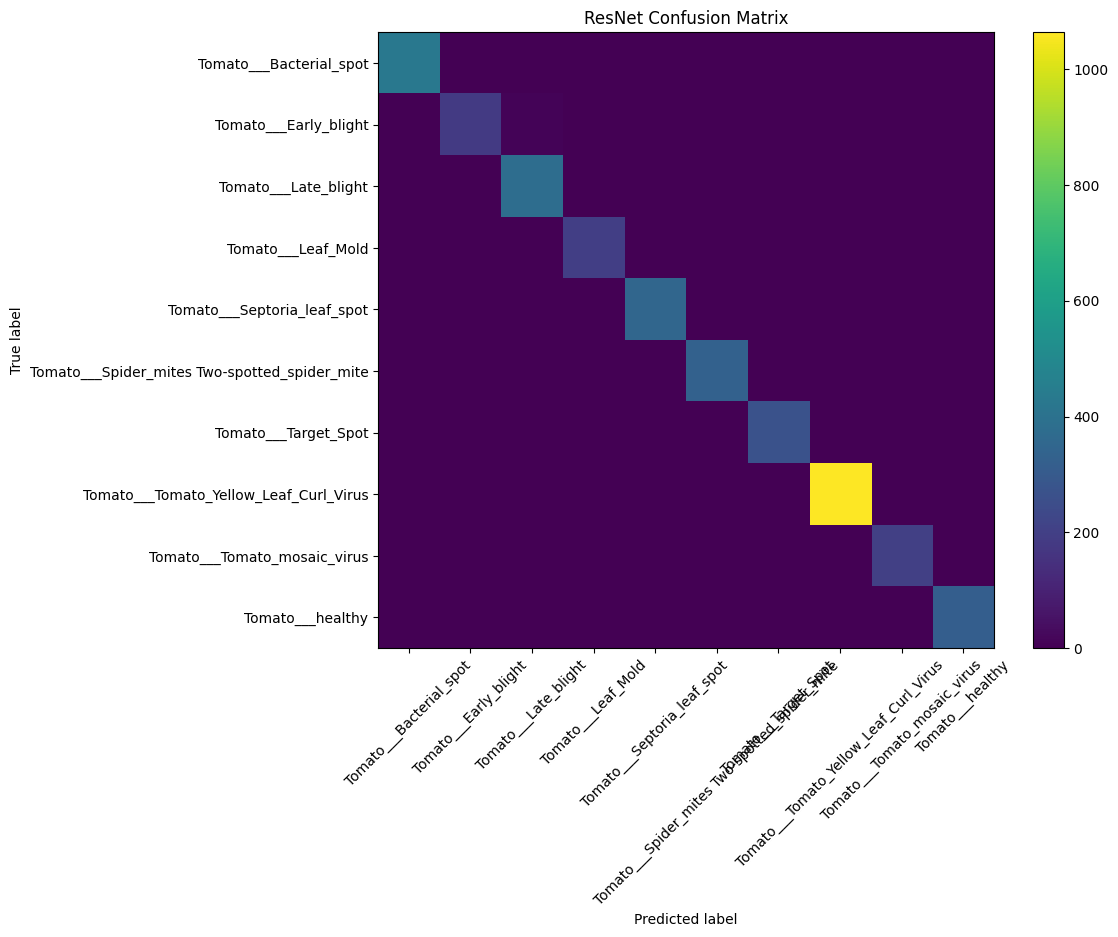

In [13]:
# Get class names
class_names = test_ds.class_names

# Get predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(resnet_model.predict(test_ds), axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest')
plt.title("ResNet Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Kode di atas melakukan analisis mendalam terhadap kinerja model ResNet50 pada data pengujian, terutama berfokus pada evaluasi per kelas. Pertama, kode mengambil nama-nama kelas (class_names) dan kemudian menghasilkan label sebenarnya (y_true) dan prediksi model (y_pred) dari seluruh dataset pengujian (test_ds). Prediksi model dihasilkan oleh resnet_model.predict(test_ds) dan mengambil indeks probabilitas tertinggi (np.argmax). Selanjutnya, kode menghitung Confusion Matrix (cm) menggunakan confusion_matrix(y_true, y_pred). Hasil evaluasi per kelas kemudian dicetak menggunakan Classification Report, yang merangkum metrik krusial seperti presisi, recall, dan f1-score untuk setiap kelas, memberikan wawasan statistik mendalam tentang performa model. Terakhir, Confusion Matrix divisualisasikan sebagai heatmap menggunakan Matplotlib, diberi judul "ResNet Confusion Matrix", yang memungkinkan identifikasi visual tentang kelas mana yang sering dikacaukan oleh model.